In [14]:
###################################################################
# Imports                                                         #
###################################################################
import datetime
import matplotlib.dates as mdates
import matplotlib.lines as lines
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime

In [15]:
###################################################################
# Description:                                                    #
# Gunction which filters input data frame by a specific column    #
# which defines amount of data collected in a specific day        #
# This could be number of first doses or first cases.             #
# The function returns a data frame containing summary of the     #
# chosen column for a specific day.                               # 
# One important assumption is that the data provided in           #
# the column is being accumulated over time                       #
#-----------------------------------------------------------------#
# Arguments:                                                      #
# input_data_frame - frame collected from CSV file                #
# name_of_date_column - name of columns with the date in the      #
#                       format for example 12/24/2020 meaning     #
#                       the 24th of December 2020                 #
# name_of_filtering_column - name of column containing aggregated #
#                            count per day                        #
#-----------------------------------------------------------------#
# Returns:                                                        #
# Data frame with two columns 'Day' number of days since the      #
# 1st of January 1970, 'Count' - count of collected day in that   #
# day.                                                            #
###################################################################
def accumulate_per_day(input_data_frame,
                       name_of_date_column,
                       name_of_filtering_column):
    
    result_df = pd.DataFrame(columns=['Day', 'Count'])

    # set index to be current datettime
    input_data_frame.index = pd.to_datetime(
        input_data_frame[name_of_filtering_column], errors='coerce', format='%m/%d/%Y')
    input_data_frame.sort_index()

    current_day = 0
    current_day_count_acc = 0
    previous_day_count_acc = 0

    # Now we will iterate through all the rows accumulating existing counts
    # for the current given day.
    print("Please wait, it may take up to a minute to analyse the data")
    for (index, row) in covid_vaccines_df.iterrows():

        # Get the first count for a set of rows belonging to the current day.
        report_as_of = row[name_of_date_column]
        first_daily_count_acc = row[name_of_filtering_column]

        # Convert date from string to datetime.
        current_day_read = (pd.to_datetime(report_as_of, errors='coerce') -
                            datetime.datetime(1970, 1, 1)).days

        if current_day_read == current_day:

            # We accumulate count from current day from different region and county,
            # if the day has not change.
            current_day_count_acc += first_daily_count_acc

        else:

            # If the day has changed, but not not first the first time
            if current_day != 0:

                # Create new entry in the accumulative data frame.
                new_row = {'Day': current_day,
                           'Count': current_day_count_acc - previous_day_count_acc}
                result_df = result_df.append(new_row, ignore_index = True)

                # Remember this day's accumulative count as previous day's accumulative count/
                previous_day_count_acc = current_day_count_acc

            # We switch to new day
            current_day = current_day_read
            current_day_count_acc = 0

    # Deal with the last row.
    new_row = {'Day': current_day,
               'Count': current_day_count_acc - previous_day_count_acc}
    result_df = result_df.append(new_row, ignore_index = True)

    return result_df

In [16]:
###################################################################
# Filtering by week.                                              #
#-----------------------------------------------------------------#
# Arguments:                                                      #
# daily_df - daily data frame                                     #
#-----------------------------------------------------------------#
# Returns:                                                        #
# Weekly data                                                     #
###################################################################
def filter_weekly(daily_df):
    
    result_df = pd.DataFrame(columns=['Week', 'Count'])
    week_day = 0
    week_count = 0
    current_count_per_day_acc = 0
    
    for (_, row) in daily_df.iterrows():

        week_day += 1
        current_count_per_day_acc += row.Count

        if week_day == 6:

            # The end of the week
            new_row = {'Week': week_count,
                       'Count': current_count_per_day_acc}

            # Let's add the data to the result for a finished week.
            result_df = result_df.append(new_row, ignore_index = True)
            current_count_per_day_acc = 0

            week_count += 1
            week_day = 0

    # Deal with the last row, if there is any data left over.
    if week_day != 0:
        new_row = {'Week': week_count,
                   'Count': current_count_per_day_acc}
        result_df = result_df.append(new_row, ignore_index = True)
    
    return result_df

In [17]:
###################################################################
# Filtering by week.                                              #
#-----------------------------------------------------------------#
# Arguments:                                                      #
# daily_df - daily data frame                                     #
#-----------------------------------------------------------------#
# Returns:                                                        #
# Weekly data                                                     #
###################################################################
def filter_weekly(daily_df):
    
    result_df = pd.DataFrame(columns=['Week', 'Count'])
    week_day = 0
    week_count = 0
    current_count_per_day_acc = 0
    
    for (_, row) in daily_df.iterrows():

        week_day += 1
        current_count_per_day_acc += row.Count

        if week_day == 6:

            # The end of the week
            new_row = {'Week': week_count,
                       'Count': current_count_per_day_acc}

            # Let's add the data to the result for a finished week.
            result_df = result_df.append(new_row, ignore_index = True)
            current_count_per_day_acc = 0

            week_count += 1
            week_day = 0

    # Deal with the last row, if there is any data left over.
    if week_day != 0:
        new_row = {'Week': week_count,
                   'Count': current_count_per_day_acc}
        result_df = result_df.append(new_row, ignore_index = True)
    
    return result_df

In [18]:
###################################################################
# Collect data from CSV files stored in GITHUB                    #
####################################################################

covid_cases_df = pd.read_csv(
    'https://gist.githubusercontent.com/palles77/ba949ebb6c37bc9039fe56cdf401523d/raw/6b6845898cbdd2c445d4b3e839eba157c798b91a/newyork_covid_cases.csv')
covid_vaccines_df = pd.read_csv(
    'https://gist.githubusercontent.com/palles77/6f37b7df30f10267ed5fb278b9471ab0/raw/3567a37c991e934bb4c705e0cb5e8faa09ce093d/newyork_covid_vaccines.csv')


In [19]:
###################################################################
# Filter daily_df to weekly_df by collecting the sum of count in  #
# rows from daily_df every 7 days.                                #
###################################################################
covid_vaccines_daily_df = accumulate_per_day(covid_vaccines_df, 'Report as of', 'First Dose')

###################################################################
# Now let's print out the daily summary.                          #
###################################################################
for (index, row) in covid_vaccines_daily_df.iterrows():
    print(f"Current day = {row.Day}, count = {row.Count}")


Please wait, it may take up to a minute to analyse the data
Current day = 18610, count = 130
Current day = 18611, count = 1287
Current day = 18612, count = 4802
Current day = 18613, count = 6006
Current day = 18614, count = 8278
Current day = 18615, count = 4903
Current day = 18616, count = 2365
Current day = 18617, count = 6476
Current day = 18618, count = 11841
Current day = 18619, count = 18190
Current day = 18620, count = 16991
Current day = 18621, count = 3677
Current day = 18622, count = 5231
Current day = 18623, count = 5516
Current day = 18624, count = 15690
Current day = 18625, count = 21102
Current day = 18626, count = 27418
Current day = 18627, count = 27479
Current day = 18628, count = 7628
Current day = 18629, count = 27345
Current day = 18630, count = 6823
Current day = 18631, count = 19533
Current day = 18632, count = 29232
Current day = 18633, count = 43934
Current day = 18634, count = 55632
Current day = 18635, count = 54048
Current day = 18636, count = 25152
Current d

In [20]:
###################################################################
# Get weekly stats                                                #
###################################################################
weekly_vaccines_df = filter_weekly(covid_vaccines_daily_df)

###################################################################
# Now let's print out the weekly summary.                         #
###################################################################
for (index_filtered, row_filtered) in weekly_vaccines_df.iterrows():
    print(f"Current week = {row_filtered.Week}, count = {row_filtered.Count}")

Current week = 0, count = 25406
Current week = 1, count = 59540
Current week = 2, count = 102436
Current week = 3, count = 134495
Current week = 4, count = 228265
Current week = 5, count = 288152
Current week = 6, count = 305082
Current week = 7, count = 297453
Current week = 8, count = 209990
Current week = 9, count = 228034
Current week = 10, count = 248825
Current week = 11, count = 184850
Current week = 12, count = 472715
Current week = 13, count = 667162
Current week = 14, count = 646531
Current week = 15, count = 575714
Current week = 16, count = 552764
Current week = 17, count = 527424
Current week = 18, count = 634804
Current week = 19, count = 802460
Current week = 20, count = 567040
Current week = 21, count = 463386
Current week = 22, count = 428189
Current week = 23, count = 282505
Current week = 24, count = 233449
Current week = 25, count = 305664
Current week = 26, count = 376953
Current week = 27, count = 309708
Current week = 28, count = 182732
Current week = 29, count =

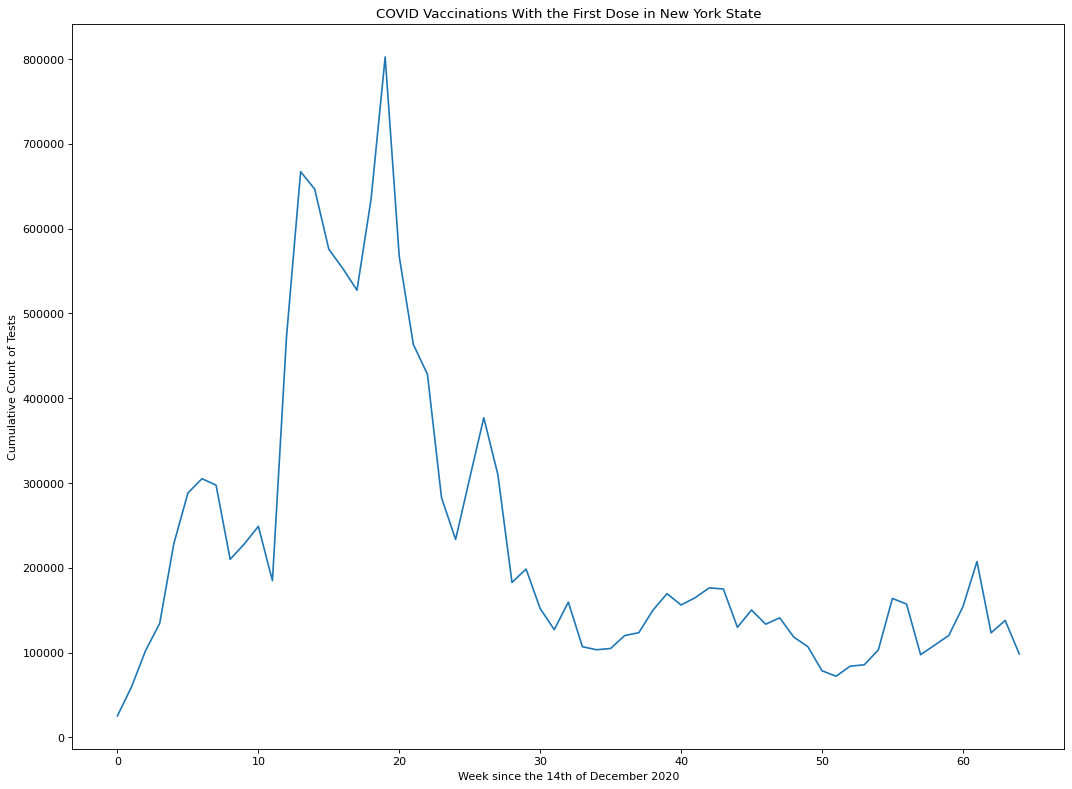

In [21]:
###################################################################
# Let's display weekly data.                                      #
###################################################################
figure(figsize=(16, 12), dpi=80)

row_first = weekly_vaccines_df.iloc[0]
row_last = weekly_vaccines_df.iloc[len(weekly_vaccines_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.plot(weekly_vaccines_df['Week'], weekly_vaccines_df['Count'])
plt.title('COVID Vaccinations With the First Dose in New York State')
plt.xlabel('Week since the 14th of December 2020')
plt.ylabel('Cumulative Count of Tests')

plt.show()


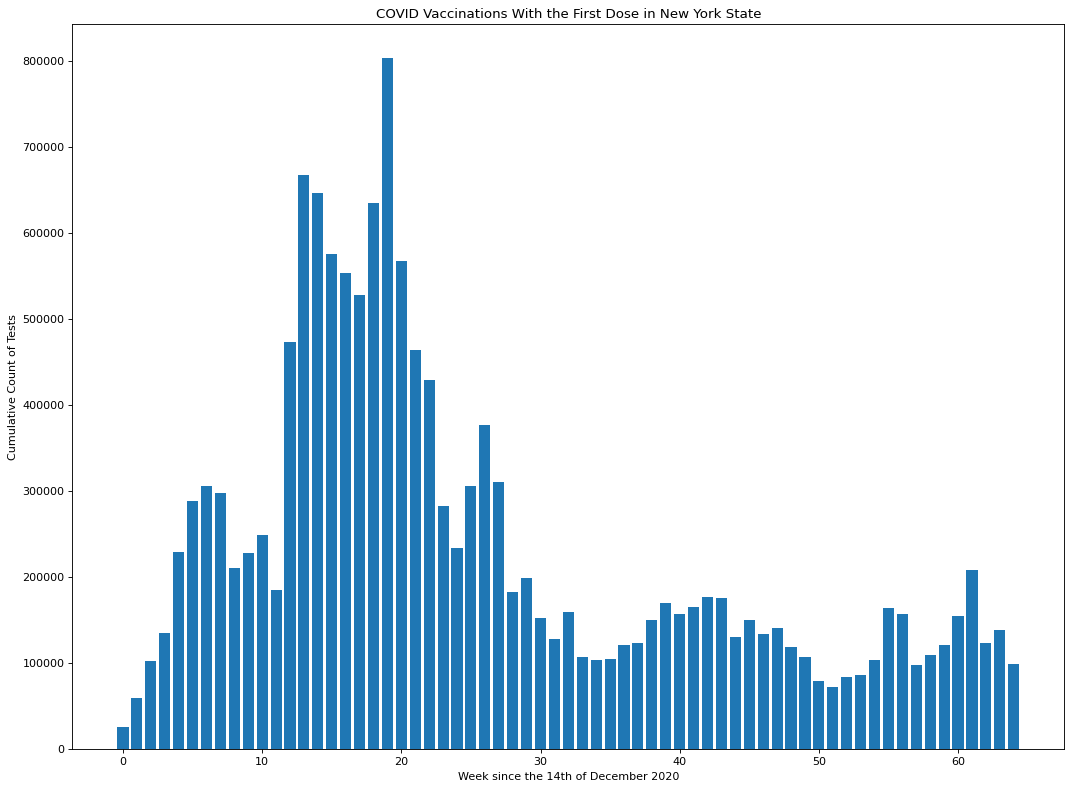

In [22]:
###################################################################
# 1. Wyświetlić wykres powyżej jako wykres słupkowy               #
###################################################################
figure(figsize=(16, 12), dpi=80)

row_first = weekly_vaccines_df.iloc[0]
row_last = weekly_vaccines_df.iloc[len(weekly_vaccines_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.bar(weekly_vaccines_df['Week'], weekly_vaccines_df['Count'])
plt.title('COVID Vaccinations With the First Dose in New York State')
plt.xlabel('Week since the 14th of December 2020')
plt.ylabel('Cumulative Count of Tests')

plt.show()

Please wait, it may take up to a minute to analyse the data


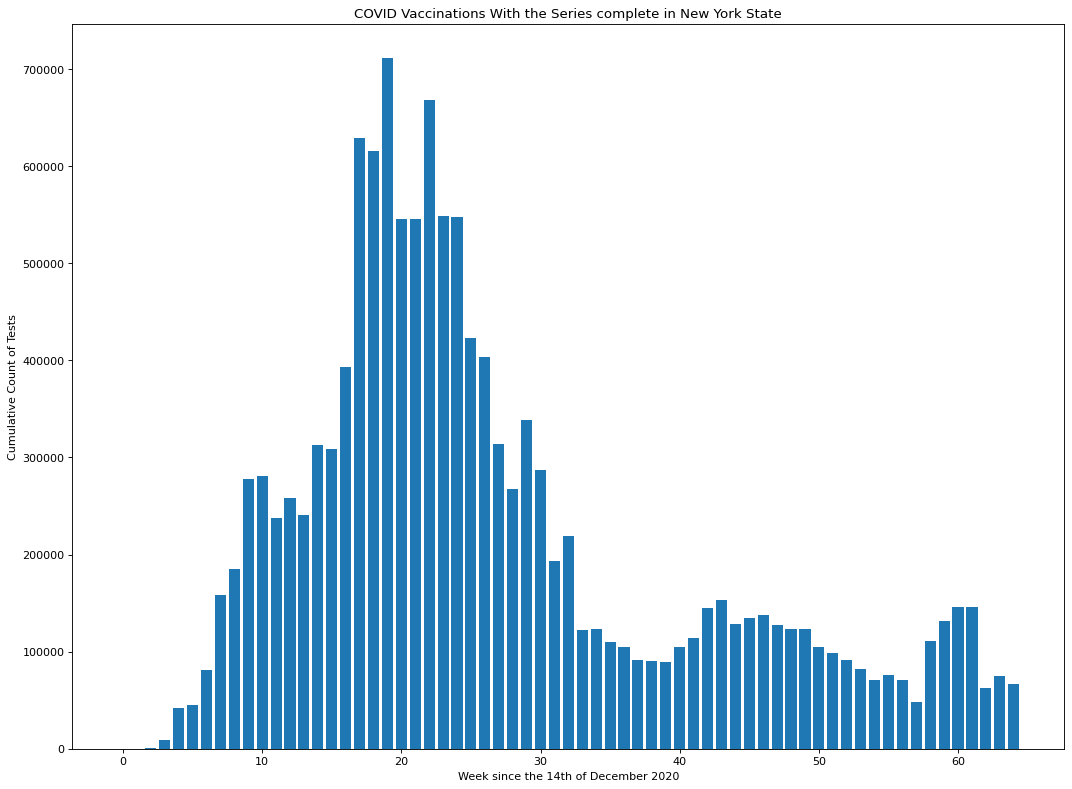

In [23]:
###################################################################
# 2. Wyświetlić ilość pełnych zaszczepień (kolumna 'Series Complete' z covid_vaccines_df) tygodniowo 
#    jako wykres słupkowy w ilościach tygodniowych
###################################################################
covid_vaccines_daily_df = accumulate_per_day(covid_vaccines_df, 'Report as of', 'Series Complete')
weekly_vaccines_df = filter_weekly(covid_vaccines_daily_df)

figure(figsize=(16, 12), dpi=80)


row_first = weekly_vaccines_df.iloc[0]
row_last = weekly_vaccines_df.iloc[len(weekly_vaccines_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.bar(weekly_vaccines_df['Week'], weekly_vaccines_df['Count'])
plt.title('COVID Vaccinations With the Series complete in New York State')
plt.xlabel('Week since the 14th of December 2020')
plt.ylabel('Cumulative Count of Tests')

plt.show()

In [24]:
def accumulate_per_day_custom(input_data_frame,
                       name_of_date_column,
                       name_of_filtering_column):
    
    result_df = pd.DataFrame(columns=['Day', 'Count'])
    
    # set index to be current datettime
    input_data_frame.index = pd.to_datetime(
        input_data_frame[name_of_filtering_column], errors='coerce', format='%m/%d/%Y')
    input_data_frame.sort_index()

    current_day = 0
    current_day_count_acc = 0
    previous_day_count_acc = 0

    # Now we will iterate through all the rows accumulating existing counts
    # for the current given day.
    print("Please wait, it may take up to a minute to analyse the data")
    for (index, row) in covid_cases_df.iterrows():

        # Get the first count for a set of rows belonging to the current day.
        report_as_of = row[name_of_date_column]
        first_daily_count_acc = row[name_of_filtering_column]

        # Convert date from string to datetime.
        current_day_read = (pd.to_datetime(report_as_of, errors='coerce') -
                            datetime.datetime(1970, 1, 1)).days

        if current_day_read == current_day:

            # We accumulate count from current day from different region and county,
            # if the day has not change.
            current_day_count_acc += first_daily_count_acc

        else:

            # If the day has changed, but not not first the first time
            if current_day != 0:
                # Create new entry in the accumulative data frame.
                new_row = {'Day': current_day,
                           'Count': current_day_count_acc}
                result_df = result_df.append(new_row, ignore_index = True)

                # Remember this day's accumulative count as previous day's accumulative count/
                previous_day_count_acc = current_day_count_acc

            # We switch to new day
            current_day = current_day_read
            current_day_count_acc = 0

    # Deal with the last row.
    new_row = {'Day': current_day,
               'Count': current_day_count_acc - previous_day_count_acc}
    result_df = result_df.append(new_row, ignore_index = True)

    return result_df

Please wait, it may take up to a minute to analyse the data


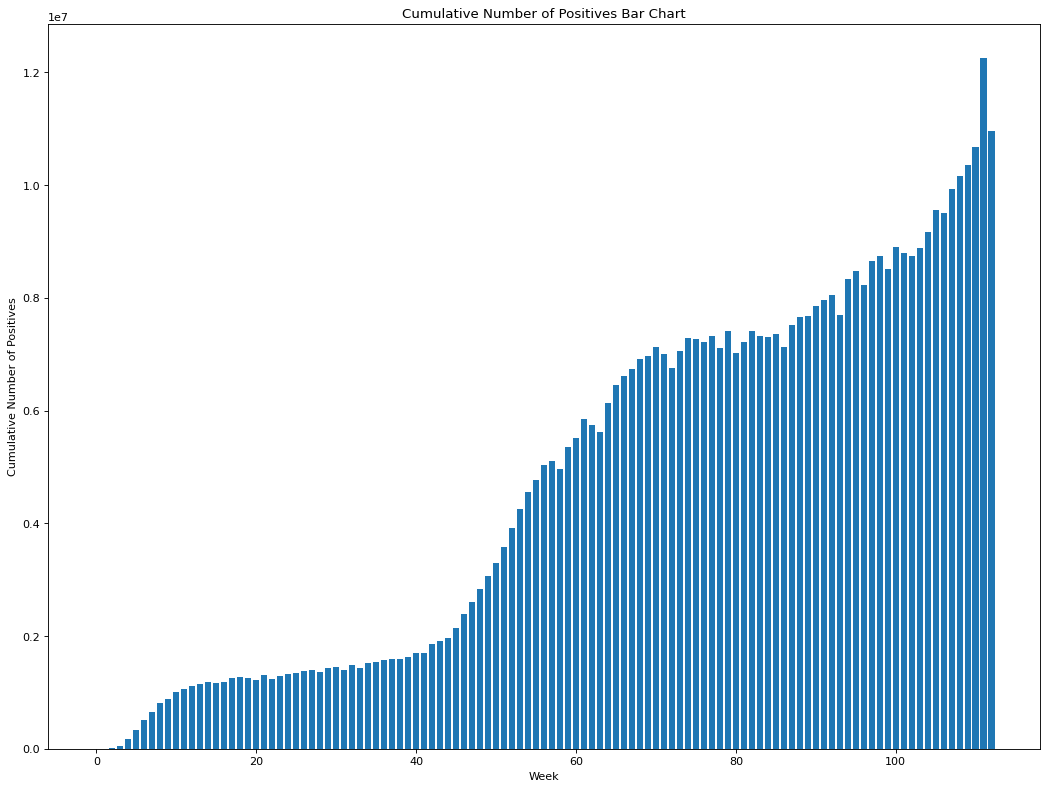

In [25]:
###################################################################
# 3. Wyświetlić ilość nowych pozytywnych przypadków (kolumna 'Cumulative Number of Positives' z covid_cases_df)
#    jako wykres słupkowy w ilościach tygodniowych
###################################################################
covid_cases_df['Test Date'] = pd.to_datetime(covid_cases_df['Test Date'],dayfirst = False)
covid_cases_df = covid_cases_df.sort_values(by=['Test Date'])

covid_vaccines_daily_df = accumulate_per_day_custom(covid_cases_df, 'Test Date', 'Cumulative Number of Positives')
weekly_vaccines_df = filter_weekly(covid_vaccines_daily_df)

figure(figsize=(16, 12), dpi=80)

row_first = weekly_vaccines_df.iloc[0]
row_last = weekly_vaccines_df.iloc[len(weekly_vaccines_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]

plt.bar(weekly_vaccines_df['Week'], weekly_vaccines_df['Count'])
plt.title('Cumulative Number of Positives Bar Chart')
plt.xlabel('Week')
plt.ylabel('Cumulative Number of Positives')

plt.show()

Please wait, it may take up to a minute to analyse the data


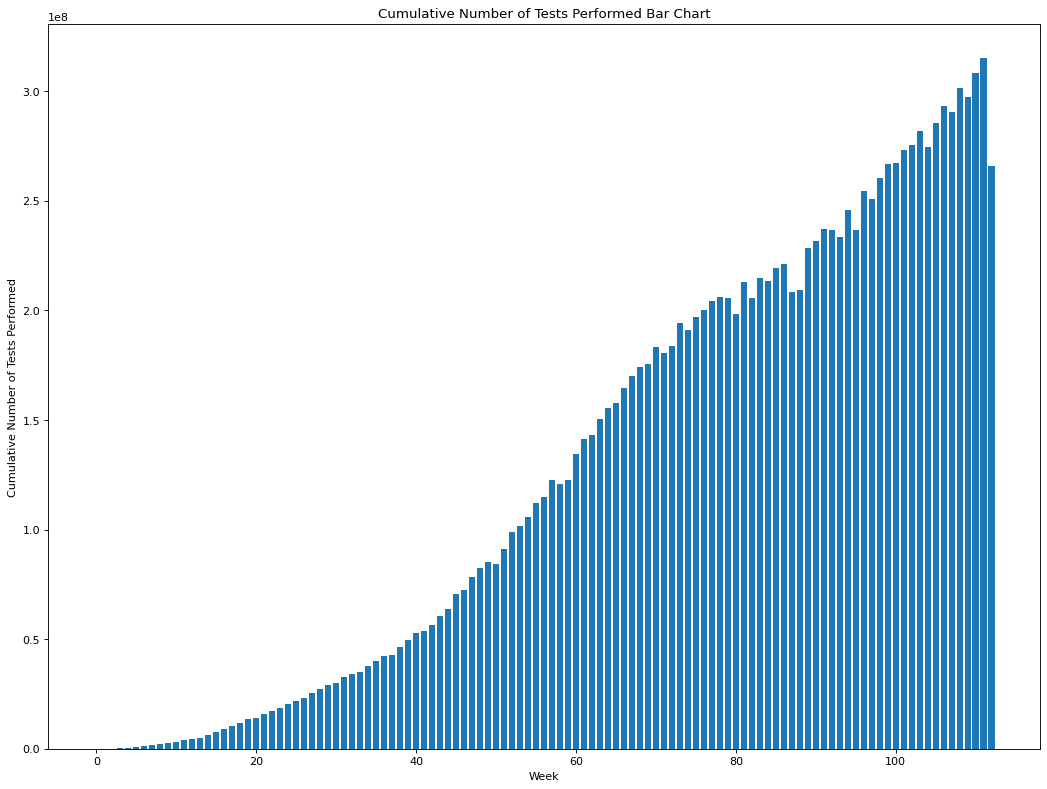

In [26]:
###################################################################
# 4. Wyświetlić ilość testów (kolumna 'Cumulative Number of Tests Performed' z covid_cases_df)
#    jako wykres słupkowy w ilościach tygodniowych
###################################################################
covid_cases_df['Test Date'] = pd.to_datetime(covid_cases_df['Test Date'],dayfirst = False)
covid_cases_df = covid_cases_df.sort_values(by=['Test Date'])

covid_vaccines_daily_df = accumulate_per_day_custom(covid_cases_df, 'Test Date', 'Cumulative Number of Tests Performed')
weekly_vaccines_df = filter_weekly(covid_vaccines_daily_df)

figure(figsize=(16, 12), dpi=80)

row_first = weekly_vaccines_df.iloc[0]
row_last = weekly_vaccines_df.iloc[len(weekly_vaccines_df.index) - 1]
minx = row_first[0]
maxx = row_last[0]


plt.bar(weekly_vaccines_df['Week'], weekly_vaccines_df['Count'])
plt.title('Cumulative Number of Tests Performed Bar Chart')
plt.xlabel('Week')
plt.ylabel('Cumulative Number of Tests Performed')

plt.show()